<a href="https://colab.research.google.com/github/profcintiapinho/python_basico/blob/main/Aula_extra_Nuvem_de_Palavra_Gerada_Pelo_Google_Forms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nuvem de Palavra- Inscrições do Curso - Frases de Vocês...

In [2]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

In [3]:
# esse código permite que o notebook acesse seu documento xls qu está no seu Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Veja neste video como armazenar uma planilha excel no Github ou no drive para usar como base de dados no COLAB##

**Aqui nesse link pode aprender como pegar uma planilha do google forms e aproveitar para fazer análise de dados**

https://agirweb.com.br/passos-para-criar-uma-base-de-dados-por-google-forms/


**Essa playlist mostra como salvar planilha xls aquivo no drive, converter para csv e depois salvar no drive e github.**

https://www.youtube.com/watch?v=kKFe7ZxHLEE&list=PLLxTDONTQvEd8Eew7MdT1YZppalFeh4E2

In [4]:
#usando base do Github
basedogit = pd.read_csv('https://raw.githubusercontent.com/profcintiapinho/python_basico/main/pesquisa2022.csv',encoding='utf-8')

#usando base do Drive
basedodrive = pd.read_csv('/content/drive/MyDrive/baseDados/pesquisa2022.csv',encoding='utf-8')


In [5]:
basedogit.head()

,turma,turno,computador,motivacao,cursou,cursar,escolha1,escolha2
0,2C,Manhã,Sim,"Tenho interesse na área, gosto muito de progra...",NÃO,Sim,Quartas das 19h as 20h,NaN
1,2C,Manhã,Sim,Tenho muito interesse em conhecer mais sobre I...,SIM,NaN,NaN,Machine Learning (Aprendizado de Máquina) - Qu...
2,2C,Noite,Sim,Eu quero aprender para que eu possa ter mais c...,NÃO,Sim,Terças das 20h00 as 21H00,NaN
3,3I,Tarde,Sim,"é o futuro, sempre tive interesse de aprender ...",NÃO,Sim,Terças das 20h00 as 21H00,NaN
4,2I,Tarde,Sim,tenho interesse em aprender coisas novas,NÃO,Sim,Terças das 20h00 as 21H00,NaN


In [6]:
#só para mostrar que as duas formas funciona
basedodrive.head()

,turma,turno,computador,motivacao,cursou,cursar,escolha1,escolha2
0,2C,Manhã,Sim,"Tenho interesse na área, gosto muito de progra...",NÃO,Sim,Quartas das 19h as 20h,NaN
1,2C,Manhã,Sim,Tenho muito interesse em conhecer mais sobre I...,SIM,NaN,NaN,Machine Learning (Aprendizado de Máquina) - Qu...
2,2C,Noite,Sim,Eu quero aprender para que eu possa ter mais c...,NÃO,Sim,Terças das 20h00 as 21H00,NaN
3,3I,Tarde,Sim,"é o futuro, sempre tive interesse de aprender ...",NÃO,Sim,Terças das 20h00 as 21H00,NaN
4,2I,Tarde,Sim,tenho interesse em aprender coisas novas,NÃO,Sim,Terças das 20h00 as 21H00,NaN


## Pegando somente a coluna que interessa para nuvens de palavras

In [7]:
#pega somente uma coluna
basedogit = basedogit[['motivacao']]

In [8]:
basedogit

,motivacao
0,"Tenho interesse na área, gosto muito de progra..."
1,Tenho muito interesse em conhecer mais sobre I...
2,Eu quero aprender para que eu possa ter mais c...
3,"é o futuro, sempre tive interesse de aprender ..."
4,tenho interesse em aprender coisas novas
...,...
94,Para ter maior conhecimento sobre tecnologias ...
95,Quero admitir novos conhecimentos e aprender c...
96,Adquirir mais conhecimento dessa linguagem de ...
97,"É importante aprender coisas novas, ainda mais..."


In [34]:
#biblioteca de PLN
import spacy
#BIBLIOTECA PARA TRATAR EXPRESSÕES REGULARES, TIRAR CARACTERES ESPECÍFICOS DO TEXTO
import re

In [35]:
#importano especificações em português
!python -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.2 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=5242142fa36be95daedef8c9f74920d95d172f6e4ca57d3defc0a7bc68f33908
  Stored in directory: /tmp/pip-ephem-wheel-cache-7uyq14d4/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [36]:
#carregado o que foi baixado em pln
pln = spacy.load('pt')

In [37]:
#pegando as stopwords em português que já tem na biblioteca do spacy
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

## As Stop Words são palavras que não necessitam ser indexadas, por possui pouco significado, tais como preposições, artigos, conjunções e outros. Vamos retorar do nosso texto para a nuvem de palavras trazer realmente as palavras de maior significado.

In [38]:
#veja os exemplos
stop_words

{'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá',
 'd

In [39]:
'e' in stop_words

False

In [40]:
# acrescentar artigos
pln.Defaults.stop_words.add("e")

In [41]:
'e' in stop_words

True

In [53]:
# acrescentar artigos
pln.Defaults.stop_words.add("e") # assim acrescenta somente uma palavra
# assim acrescenta várias ao mesmo tempo
pln.Defaults.stop_words |= {"o","é", "um","em","de", "uma","para","na", "a","acho","posso"}

In [54]:
#Pegando toda a coluna, juntando tudo e convertendo em um texto só
motivacao = basedogit['motivacao'].values #pega somente os valores da coluna
juntandotudo = '' #cria uma variável vazia
for sentimento in motivacao: # pega cada palavra da base de dados 
  juntandotudo += sentimento+" " # e vai unido dento da variável com um espaço fazio entre elas

In [55]:
juntandotudo

'Tenho interesse na área, gosto muito de programação e acho que eu me daria bem com python Tenho muito interesse em conhecer mais sobre IA, e o fato de ser uma área que vem crescendo muito atualmente, acaba me dando motivação para me aprofundar em conteúdos relacionados a isso Eu quero aprender para que eu possa ter mais conhecimentos nas área da Informática  é o futuro, sempre tive interesse de aprender esse assunto  tenho interesse em aprender coisas novas  Ano passado entrei no curso e infelizmente não pude chegar ao fim. Mesmo não sendo boa em informática, considero um assunto muito interessante e importante, tanto com maiores oportunidades no mercado de trabalho, quanto no meio acadêmico  Acho um curso interessante e bom para o currículo  Quero entender mais sobre a tecnologia para me tornar um melhor profissional para o mercado de trabalho, além de me interessa pela área por isso estou optando por realizar esse curso. Sempre quis começar a entender como funciona e aprender, é um 

In [56]:
#separa cada palavra ou caractere do texto
texto = juntandotudo.split()

In [57]:
texto

['Tenho',
 'interesse',
 'na',
 'área,',
 'gosto',
 'muito',
 'de',
 'programação',
 'e',
 'acho',
 'que',
 'eu',
 'me',
 'daria',
 'bem',
 'com',
 'python',
 'Tenho',
 'muito',
 'interesse',
 'em',
 'conhecer',
 'mais',
 'sobre',
 'IA,',
 'e',
 'o',
 'fato',
 'de',
 'ser',
 'uma',
 'área',
 'que',
 'vem',
 'crescendo',
 'muito',
 'atualmente,',
 'acaba',
 'me',
 'dando',
 'motivação',
 'para',
 'me',
 'aprofundar',
 'em',
 'conteúdos',
 'relacionados',
 'a',
 'isso',
 'Eu',
 'quero',
 'aprender',
 'para',
 'que',
 'eu',
 'possa',
 'ter',
 'mais',
 'conhecimentos',
 'nas',
 'área',
 'da',
 'Informática',
 'é',
 'o',
 'futuro,',
 'sempre',
 'tive',
 'interesse',
 'de',
 'aprender',
 'esse',
 'assunto',
 'tenho',
 'interesse',
 'em',
 'aprender',
 'coisas',
 'novas',
 'Ano',
 'passado',
 'entrei',
 'no',
 'curso',
 'e',
 'infelizmente',
 'não',
 'pude',
 'chegar',
 'ao',
 'fim.',
 'Mesmo',
 'não',
 'sendo',
 'boa',
 'em',
 'informática,',
 'considero',
 'um',
 'assunto',
 'muito',
 'inte

In [51]:
texto_sem_stop=''
for palavra in texto:  
  if palavra not in stop_words:
    texto_sem_stop += palavra+" "

In [58]:
texto_sem_stop

'Tenho interesse área, gosto programação acho daria python Tenho interesse conhecer IA, fato crescendo atualmente, acaba dando motivação aprofundar conteúdos relacionados a Eu aprender possa conhecimentos Informática futuro, interesse aprender assunto interesse aprender coisas Ano passado entrei curso infelizmente pude chegar fim. Mesmo sendo informática, considero assunto interessante importante, maiores oportunidades mercado trabalho, acadêmico Acho curso interessante currículo Quero entender a tecnologia tornar melhor profissional mercado trabalho, interessa optando realizar curso. Sempre quis começar a entender funciona aprender, interesso Melhorar currículo, aprofundar qualificar área. A atualidade. É atualizado tendências mercado trabalho exige, caso inteligência artificial, outro fator a ampliação conhecimentos, profissional pessoal também. Atender melhor demandas empresa conhecer aulas curso Quero integrar mercado trabalho ajudará bastante. vontade aprender Adquirir conheciment

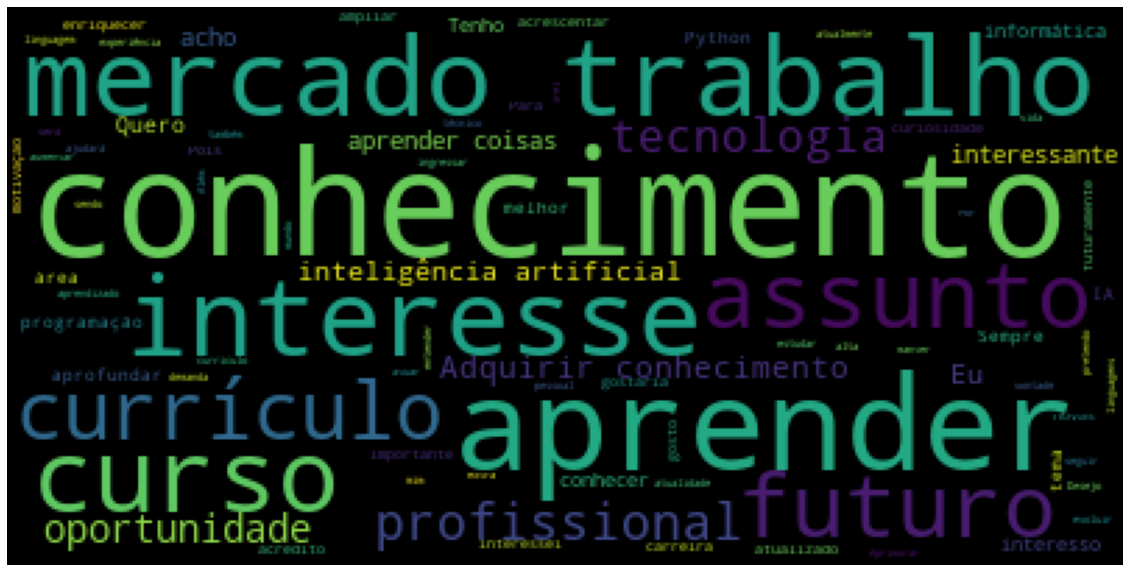

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(texto_sem_stop))